## Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

Import Python Modules

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Loading the data
This file contains GDP and life expectancy data for different countries

In [6]:
df = pd.read_csv("all_data.csv")

Exploring the Dataset

In [8]:
print(df.head())
print(df.shape)
print("Countries in dataset:", df.Country.unique())
print("Years in dataset:", df.Year.unique())


  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
(96, 4)
Countries in dataset: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
Years in dataset: [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Rename the long column name to something shorter for ease of use

In [10]:
df = df.rename(columns={"Life expectancy at birth (years)": "LEABY"})
print(df.head())

  Country  Year  LEABY           GDP
0   Chile  2000   77.3  7.786093e+10
1   Chile  2001   77.3  7.097992e+10
2   Chile  2002   77.8  6.973681e+10
3   Chile  2003   77.9  7.564346e+10
4   Chile  2004   78.0  9.921039e+10


Plot the distribution of GDP values

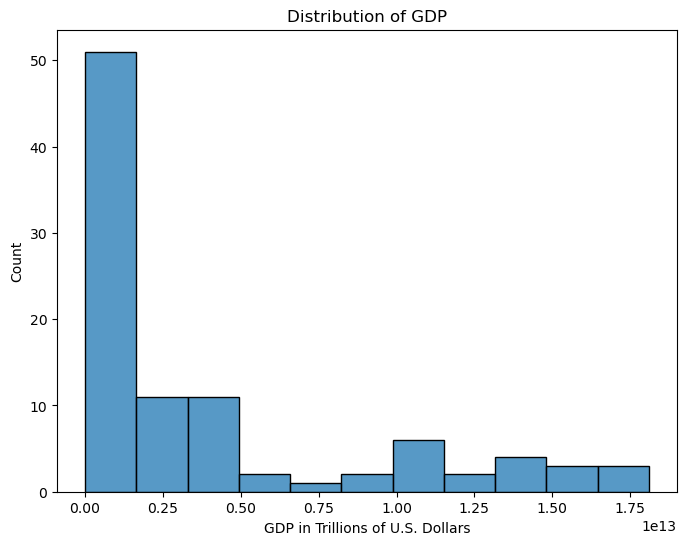

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(df.GDP)  # Histogram of GDP values
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("Distribution of GDP")
plt.show()


Plot distribution of Life Expectancy values

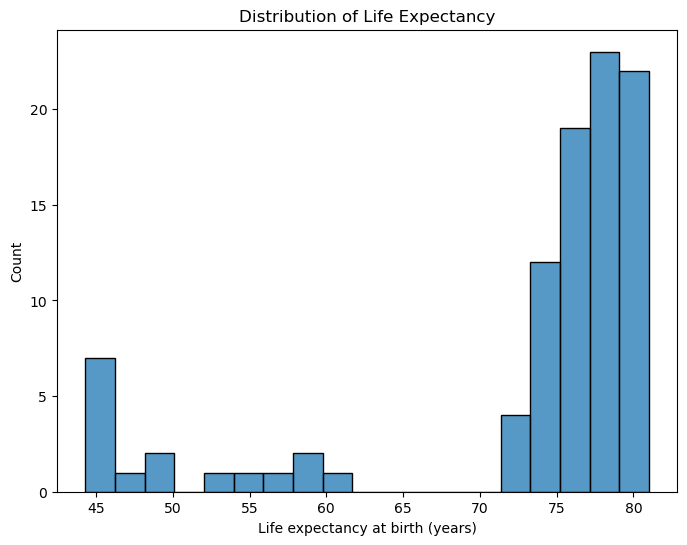

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df.LEABY) 
plt.xlabel("Life expectancy at birth (years)")
plt.title("Distribution of Life Expectancy")
plt.show()


Compute the average GDP and Life expectancy for each country

In [16]:
df_means = df.groupby("Country").mean().reset_index()
print(df_means)

                    Country    Year     LEABY           GDP
0                     Chile  2007.5  78.94375  1.697888e+11
1                     China  2007.5  74.26250  4.957714e+12
2                   Germany  2007.5  79.65625  3.094776e+12
3                    Mexico  2007.5  75.71875  9.766506e+11
4  United States of America  2007.5  78.06250  1.407500e+13
5                  Zimbabwe  2007.5  50.09375  9.062580e+09


Create bar plots for average life expectancy per country and average GDP per country

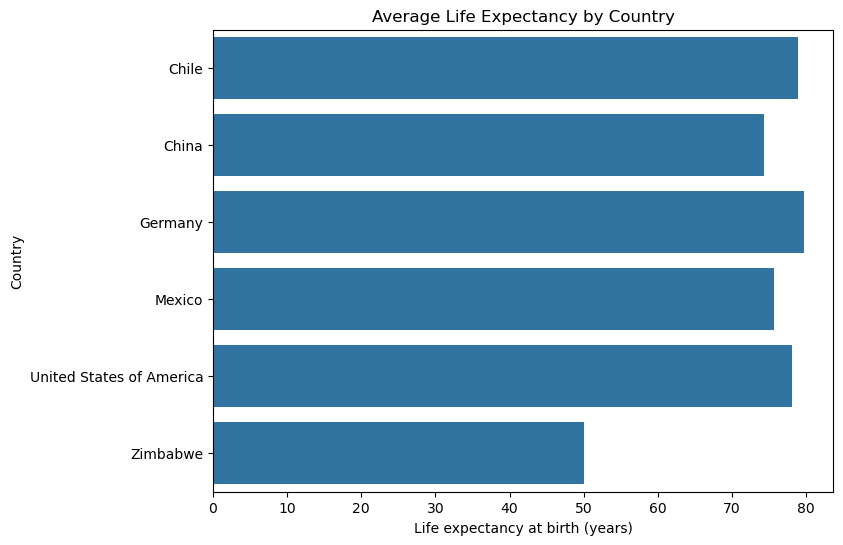

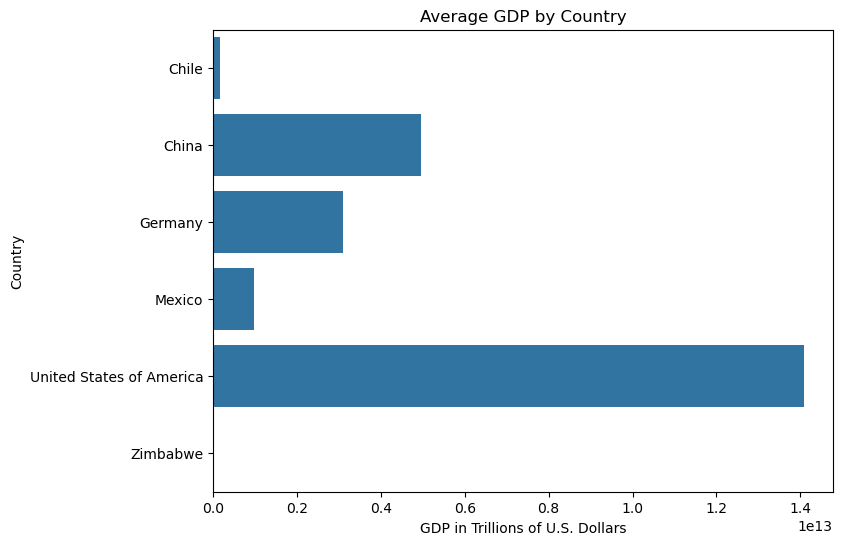

In [18]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEABY", y="Country", data=df_means)
plt.xlabel("Life expectancy at birth (years)")
plt.title("Average Life Expectancy by Country")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="GDP", y="Country", data=df_means)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title("Average GDP by Country")
plt.show()

Create violin plots to show distribution and density of GDP and Life Expectancy per county

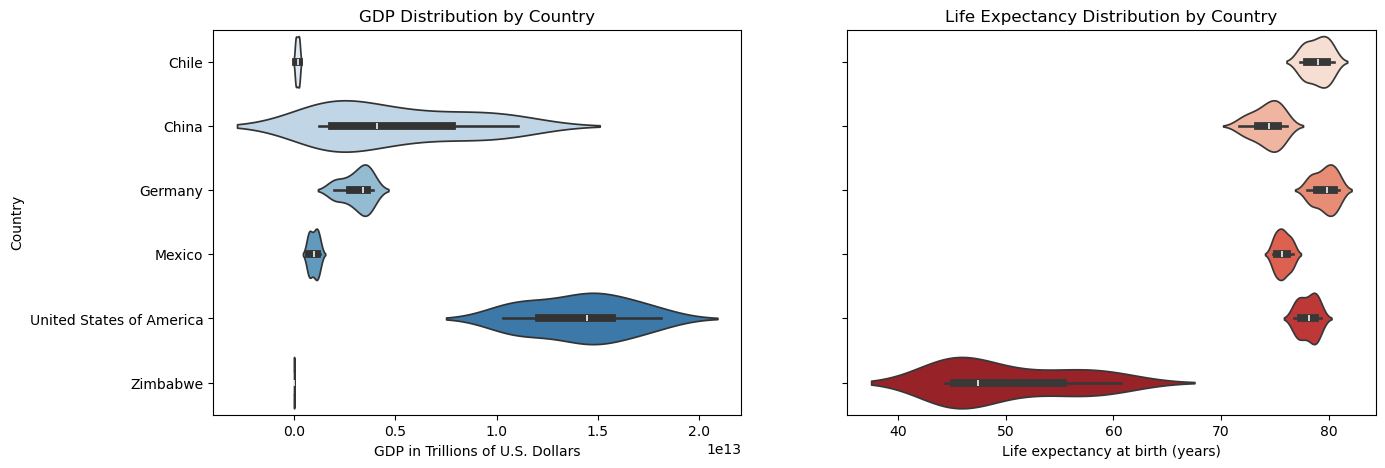

In [20]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 5))
sns.violinplot(ax=axes[0], x=df.GDP, y=df.Country, hue=df.Country, legend=False, palette="Blues")
axes[0].set_xlabel("GDP in Trillions of U.S. Dollars")
axes[0].set_title("GDP Distribution by Country")
sns.violinplot(ax=axes[1], x=df.LEABY, y=df.Country, hue=df.Country, legend=False, palette="Reds")
axes[1].set_xlabel("Life expectancy at birth (years)")
axes[1].set_title("Life Expectancy Distribution by Country")
plt.show()

Line plot of GDP over time and Life Expectancy over time for each country

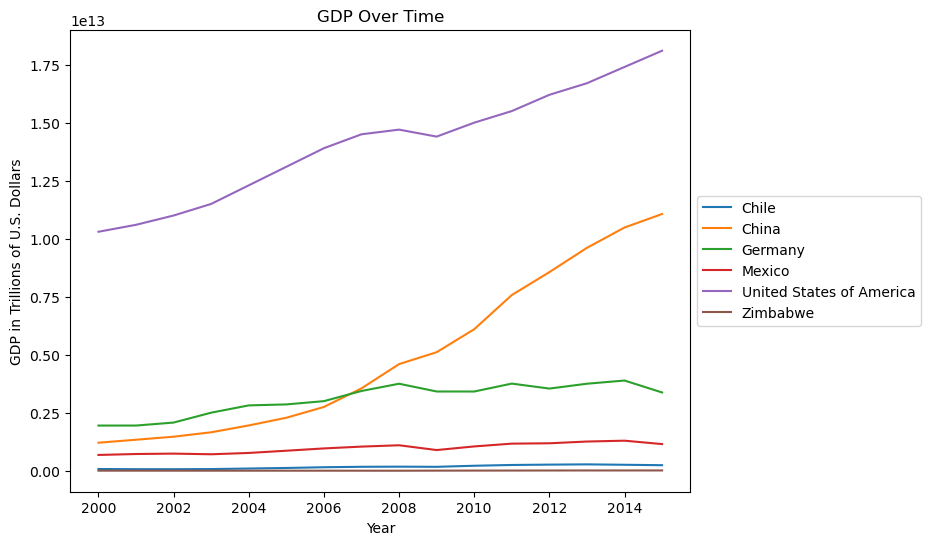

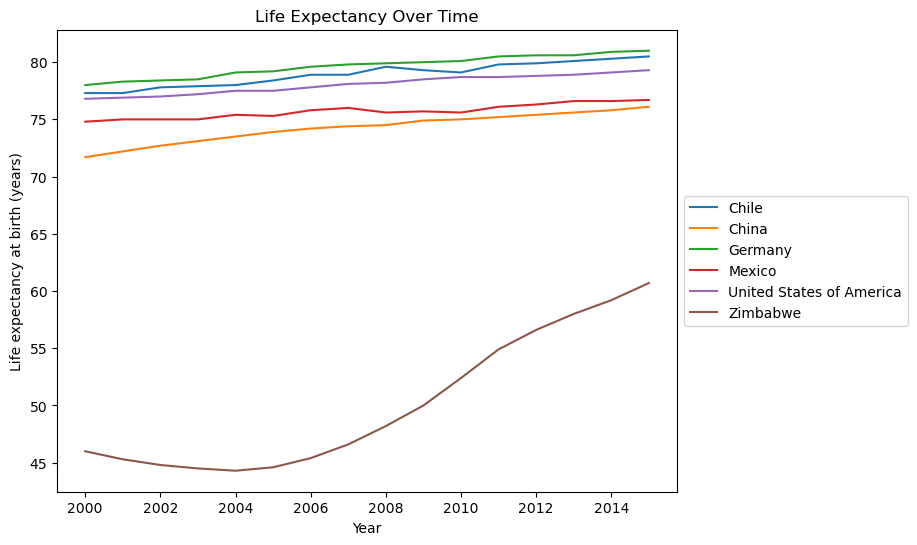

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEABY, hue=df.Country)
plt.ylabel("Life expectancy at birth (years)")
plt.title("Life Expectancy Over Time")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Individual line graphs for GDP and Life Expectancy over time for each country

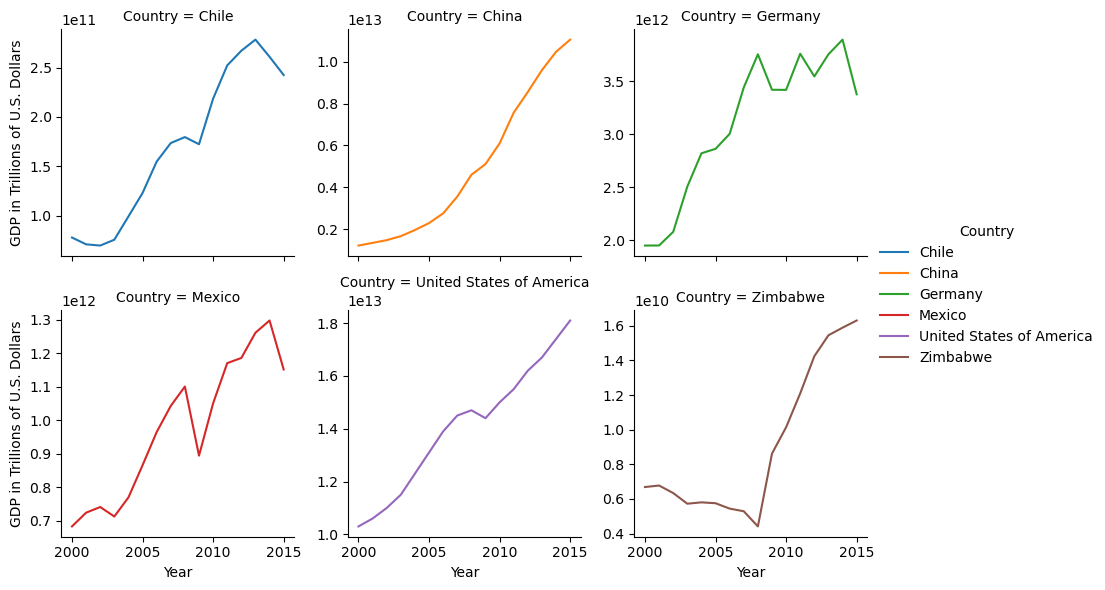

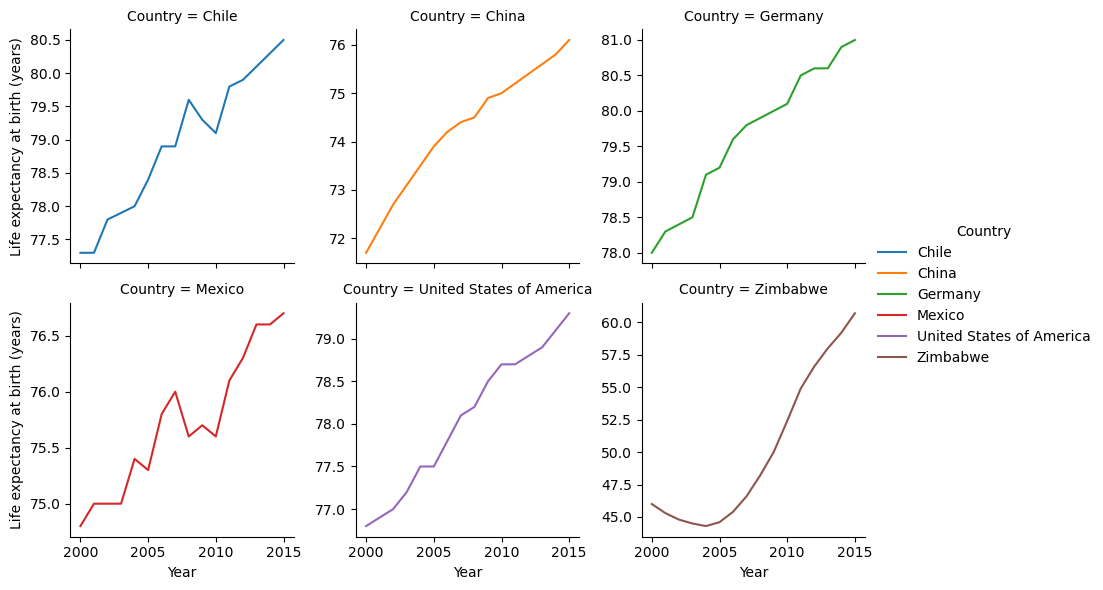

In [24]:
graphGDP = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphGDP = (graphGDP.map(sns.lineplot,"Year","GDP")
         .add_legend()
         .set_axis_labels("Year","GDP in Trillions of U.S. Dollars"))

graphLEABY = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False)

graphLEABY = (graphLEABY.map(sns.lineplot,"Year","LEABY")
         .add_legend()
         .set_axis_labels("Year","Life expectancy at birth (years)"))

graphLEABY;
plt.show()

Scatter plot to explore relationship between GDP and Life Expectancy

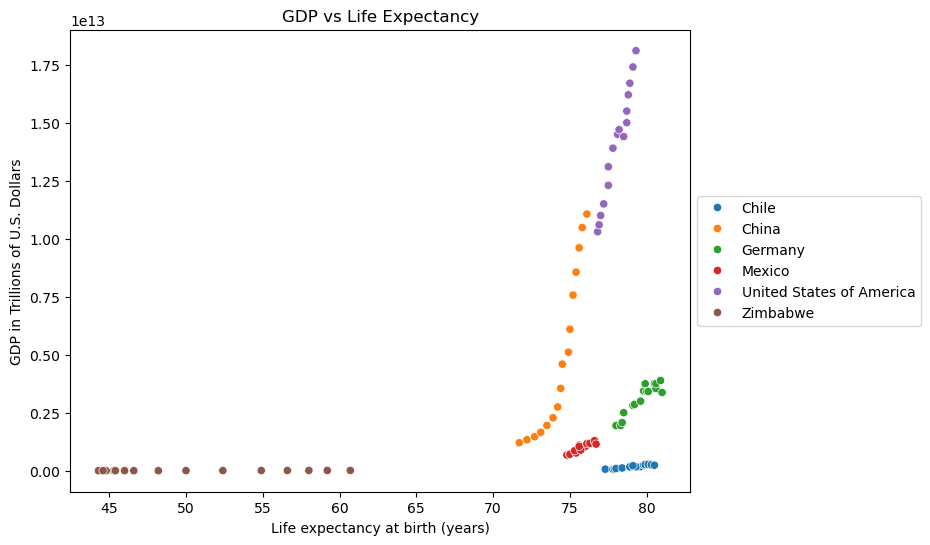

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.LEABY, y=df.GDP, hue=df.Country)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillions of U.S. Dollars")
plt.title("GDP vs Life Expectancy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

Individual scatterplots for GDP and Life Expectancy per country

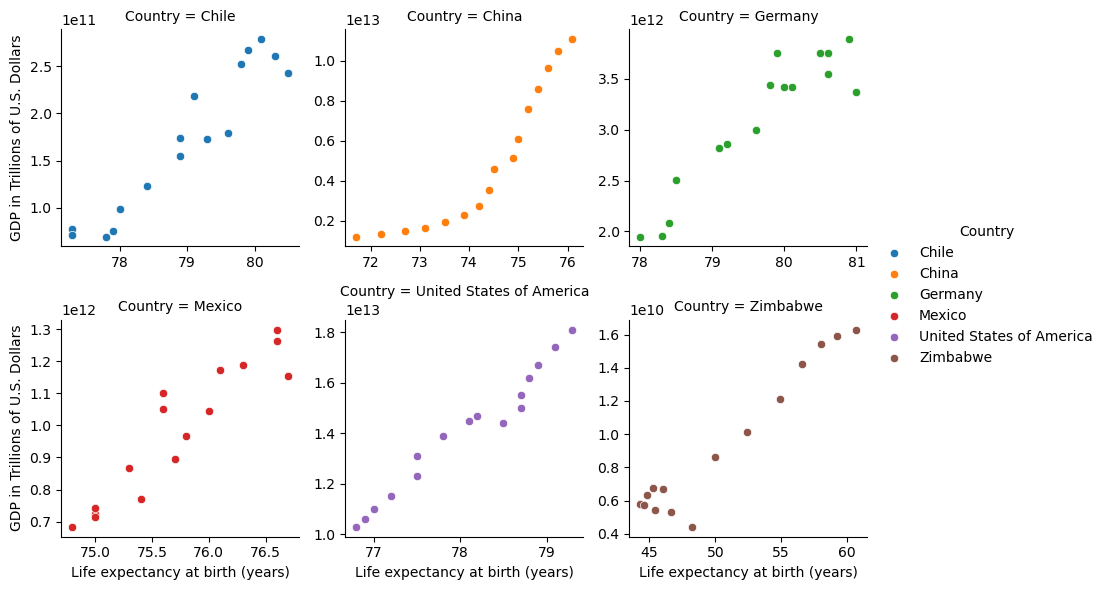

In [28]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"LEABY", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));
plt.show()

## Conclusions

This project successfully created multiple data visualizations despite having a relatively small dataset of only 96 rows and 4 columns.

Additionally, it provided answers to key questions posed at the beginning:

Has life expectancy increased over time in the six nations?

 - Yes, life expectancy has generally increased, with Zimbabwe showing the most significant improvement.

Has GDP increased over time in the six nations?

 - Yes, GDP has grown for all six countries, with China experiencing the most notable rise.

Is there a correlation between GDP and life expectancy?

 - Yes, there is a positive correlation—countries with higher GDPs tend to have higher life expectancy.

What is the average life expectancy in these nations?

 - Most countries had an average life expectancy in the mid to high 70s, except Zimbabwe, which had an average of around 50 years.

What is the distribution of life expectancy?

 - The distribution was left-skewed, meaning most values were concentrated on the higher end.